In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import json
import numpy as np
import pandas as pd
import seaborn as sns

#Load Data

In [24]:
with open('data/real_data/tasks.json', 'r') as file:
    tasks_data = json.load(file)
tasks = pd.DataFrame(tasks_data)

In [28]:
with open('data/real_data/resource.json', 'r') as file:
  resources_data = json.load(file)
resources = pd.DataFrame(resources_data)

In [34]:
with open('data/real_data/groups.json', 'r') as file:
  groups_data = json.load(file)
groups = pd.DataFrame(groups_data)

In [79]:
#put the predecessors and resources_group_id lists in many rows
tasks = tasks.explode('predecessors')
tasks = tasks.explode('resource_group_id')
tasks

,taskno,task_id,priority,duration,quantity,predecessors,total_resource,micro_batch_size,flow_first_step_id,parent_item_collection_id,predecessor_item_collection_id,use_all_resources,resource_group_id,resource_count,rule_id
0,WO20946-10,79828,34,30,1.0,NaN,2,None,NaN,NaN,NaN,False,38,1,24
1,WO29559-10,102804,40,30,1.0,NaN,7,None,NaN,NaN,NaN,False,67,1,7
2,WO30798-20,106244,35,120,1.0,NaN,1,None,NaN,NaN,NaN,False,3,1,8
3,WO30819-20,106255,36,30,1.0,NaN,1,None,NaN,NaN,NaN,False,3,1,8
4,WO30820-20,106257,37,30,2.0,NaN,1,None,NaN,NaN,NaN,False,3,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,WO116699-20,391908,261,992,10.0,WO116699-10,8,None,NaN,NaN,NaN,False,24,1,15
2221,WO116707-10,392120,245,174,1.0,NaN,9,None,NaN,NaN,NaN,False,2,1,25
2221,WO116707-10,392120,245,174,1.0,NaN,9,None,NaN,NaN,NaN,False,1,1,25
2222,WO116707-20,392121,245,30,1.0,WO116707-10,1,None,NaN,NaN,NaN,False,9,1,6


## Histogram of priorities
In this histogram, most tasks are assigned a priority, indicating that they can be executed later. However, it is crucial to consider how to manage high workloads during periods of reduced task volume. Also the priority may change in the time due to the approach to the deadline.

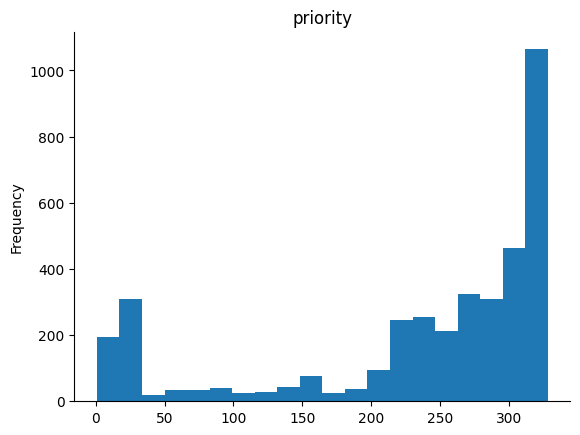

In [43]:
tasks['priority'].plot(kind='hist', bins=20, title='priority')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Histogram and line Plot of Durations
From this plot, we observe that the majority of tasks have very short durations. It may be beneficial to prioritize the execution of these tasks initially to prevent potential bottlenecks. From the Line plot we can observe  how many task can create potential bottlenecks.

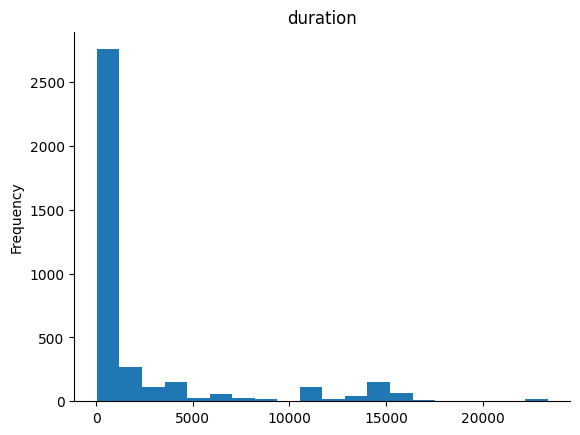

In [44]:
tasks['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

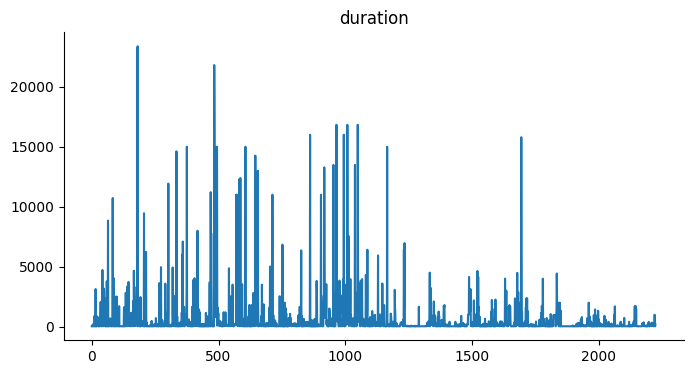

In [77]:
tasks['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

## Bar plot of resources usage
We can observe that the majority of tasks do not utilize all available resources.

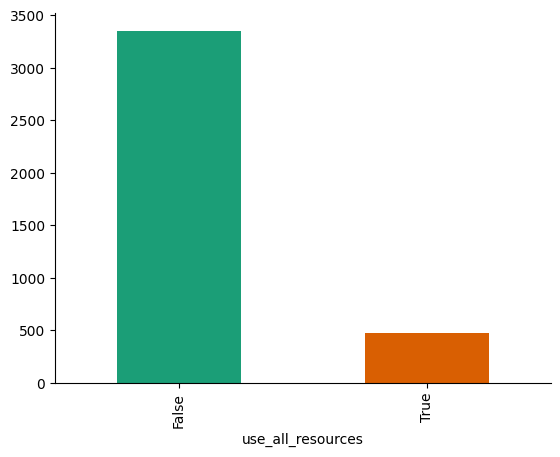

In [76]:
tasks.groupby('use_all_resources').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Scatter plot
We can observe that increasing the number of resources leads to a longer duration. This result may come from the need to parallelize and synchronize these resources.

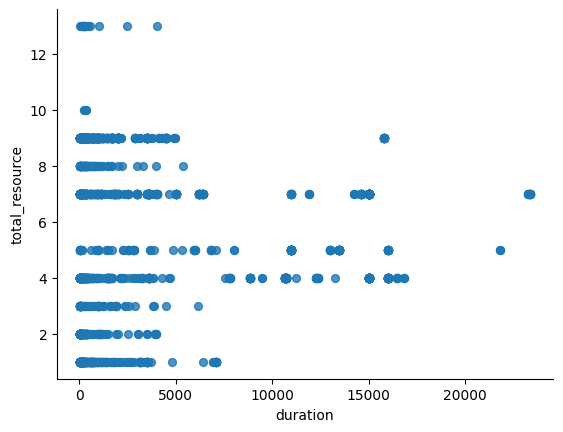

In [52]:
tasks.plot(kind='scatter', x='duration', y='total_resource', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

 ## Scatter Plot of Task Durations with Priority Clustering
 We can observe that certain tasks with high priority may create bottlenecks due to their long duration.

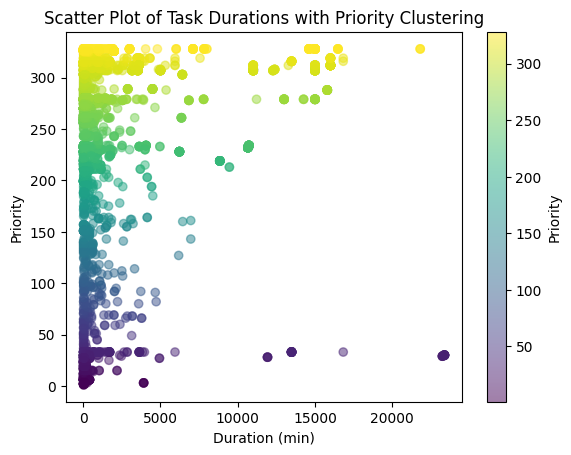

In [61]:
priorities = tasks["priority"]
durations = tasks["duration"]
# Create a scatter plot with color representing priority
plt.scatter(durations, priorities, c=priorities, cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Duration (min)')
plt.ylabel('Priority')
plt.title('Scatter Plot of Task Durations with Priority Clustering')

# Add a colorbar to indicate priority values
cbar = plt.colorbar()
cbar.set_label('Priority')

# Show plot
plt.show()